## Directing Customers to Subscription through financial app behaviour analysis

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from dateutil import parser # convert time in date time data type

#### Importing data and libraries

In [3]:
data=pd.read_csv('fintech__appdata.csv')
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
data.shape

(50000, 12)

In [5]:
for i in range(1,6):
    print(data.loc[i,'screen_list'],'\n')

joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2 

Splash,Cycle,Loan 

product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2 

idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,Institutions,SelectInstitution,BankVerification,ReferralContainer,product_review,product_review2,VerifyCountry,VerifyToken,product_review 

idscreen,Cycle,Home,ScanPreview,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,Loan2,Institutions,product_review,product_review,product_review3 



In [6]:
data.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [8]:
data.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Get unique value of each columns and its lengths

for i in data.columns:
    print(f'Unique value of {i}\n{data[i].unique()}\nlen is {len(data[i].unique())}\n---------------------------------------\n')

Unique value of user
[235136 333588 254414 ... 302367 324905  27047]
len is 49874
---------------------------------------

Unique value of first_open
['2012-12-27 02:14:51.273' '2012-12-02 01:16:00.905'
 '2013-03-19 19:19:09.157' ... '2013-02-20 22:41:51.165'
 '2013-04-28 12:33:04.288' '2012-12-14 01:22:44.638']
len is 49747
---------------------------------------

Unique value of dayofweek
[3 6 1 4 2 0 5]
len is 7
---------------------------------------

Unique value of hour
[' 02:00:00' ' 01:00:00' ' 19:00:00' ' 16:00:00' ' 18:00:00' ' 09:00:00'
 ' 03:00:00' ' 14:00:00' ' 04:00:00' ' 11:00:00' ' 06:00:00' ' 21:00:00'
 ' 05:00:00' ' 17:00:00' ' 20:00:00' ' 00:00:00' ' 22:00:00' ' 10:00:00'
 ' 08:00:00' ' 15:00:00' ' 13:00:00' ' 23:00:00' ' 12:00:00' ' 07:00:00']
len is 24
---------------------------------------

Unique value of age
[ 23  24  28  31  20  35  26  29  39  32  25  17  21  55  38  27  48  37
  22  36  30  58  40  33  57  19  45  34  46  56  42  43  41  47  18  53
  44  49 

In [10]:
data.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [11]:
# hour data convert string to int
data['hour']=data['hour'].str.slice(1,3).astype(int)

In [12]:
data.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [13]:
data.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked'],
      dtype='object')

In [14]:
# drop object type columns
data2=data.drop(columns=['user','first_open','screen_list','enrolled_date'],axis=1)

In [15]:
data2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1


#### Data Visualization

Text(0.5, 1.0, 'Heatmap')

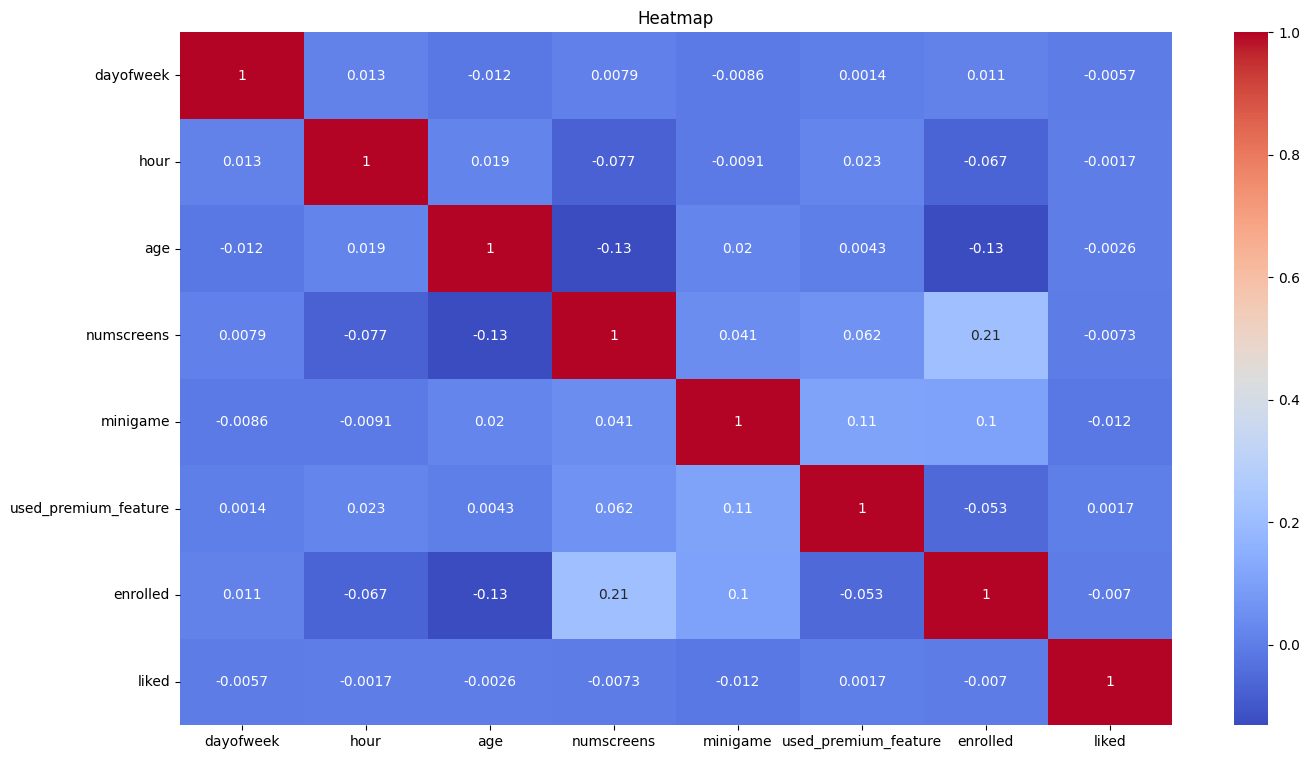

In [16]:
plt.figure(figsize=(16,9))
sns.heatmap(data2.corr(),annot=True,cmap='coolwarm')
plt.title('Heatmap')

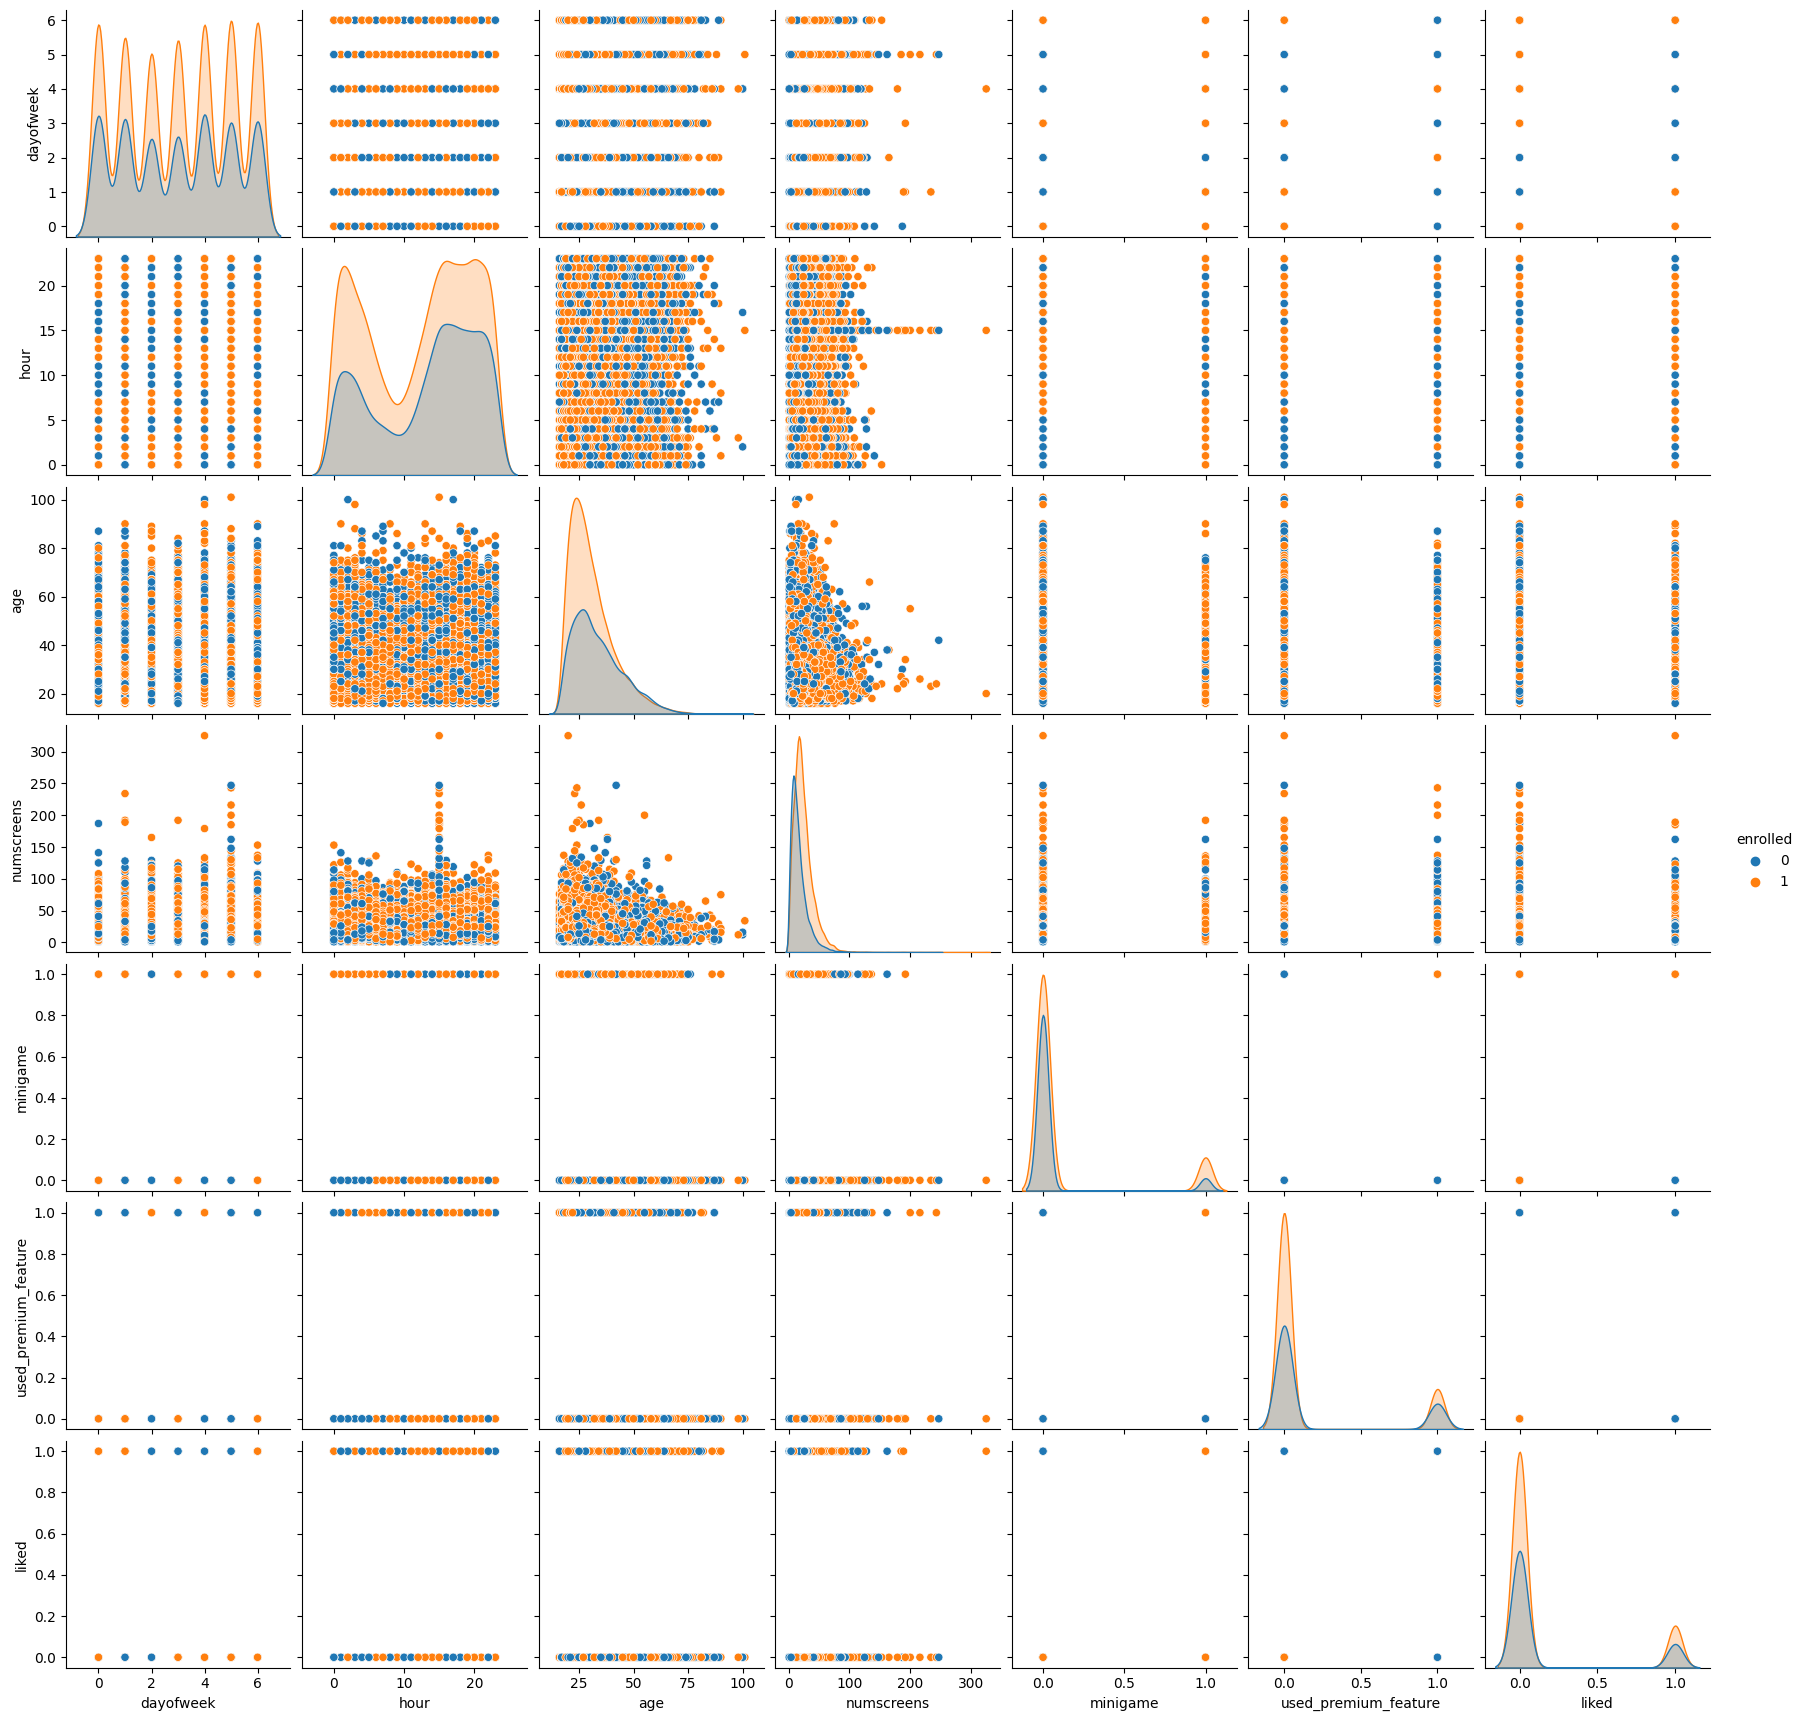

In [17]:
# pairplot
sns.pairplot(data2,hue='enrolled')

#### Note:
                0 ----> Not enrolled
                1 ----> enrolled

In [18]:
data2['enrolled'].value_counts()

1    31074
0    18926
Name: enrolled, dtype: int64

In [19]:
data2.corr()['enrolled']

dayofweek               0.011326
hour                   -0.066694
age                    -0.131303
numscreens              0.209457
minigame                0.104979
used_premium_feature   -0.052703
enrolled                1.000000
liked                  -0.007022
Name: enrolled, dtype: float64

In [20]:
data.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [21]:
# parsing object data to datetime format
data['first_open']=[parser.parse(i) for i in data['first_open']]

In [22]:
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [23]:
data['enrolled_date']=[parser.parse(i) if isinstance(i,str) else i for i in data['enrolled_date']]

In [24]:
data.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [25]:
data['time_to_enroll']=(data['enrolled_date']-data['first_open']).astype('timedelta64[ns]')

In [26]:
data.dtypes

user                              int64
first_open               datetime64[ns]
dayofweek                         int64
hour                              int32
age                               int64
screen_list                      object
numscreens                        int64
minigame                          int64
used_premium_feature              int64
enrolled                          int64
enrolled_date            datetime64[ns]
liked                             int64
time_to_enroll          timedelta64[ns]
dtype: object

In [27]:
data.drop(columns=['first_open','enrolled_date','time_to_enroll'],axis=1)

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,0
49996,169179,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,0
49997,302367,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,0
49998,324905,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,0


In [28]:
screen_data=pd.read_csv('top_screen.csv').top_screens.values
screen_data

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [29]:
# Add ',' at the end of the string of screen_list for further operation
data['screen_list']=data['screen_list']+','

In [30]:
data.iloc[1].screen_list

'joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2,'

In [31]:
data

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,time_to_enroll
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaT
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaT
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan,",3,0,1,0,NaT,1,NaT
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0 days 00:03:03.159000
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0 days 00:05:49.180000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,2013-05-09 13:46:17.871,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0,0 days 00:01:35.004000
49996,169179,2013-04-09 00:05:17.823,1,0,35,"Cycle,Splash,Home,RewardsContainer,",4,0,1,0,NaT,0,NaT
49997,302367,2013-02-20 22:41:51.165,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaT,0,NaT
49998,324905,2013-04-28 12:33:04.288,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0,0 days 00:02:34.421000


In [32]:
# string into number

for screen in screen_data:
    data[screen]=data['screen_list'].str.contains(screen).astype(int)
    data['screen_list']=data['screen_list'].str.replace(screen+",",'')

In [33]:
data.shape

(50000, 71)

In [34]:
data.sample(10)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
26432,354091,2012-12-08 23:59:31.456,5,23,19,"Credit3Home,product_review,product_review2,Sca...",22,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45257,339412,2013-02-16 18:22:39.716,5,18,54,"joinscreen,Home,ScanPreview,",6,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15540,160787,2013-02-11 06:48:48.845,0,6,21,"Home,product_review,product_review2,",8,0,0,1,...,0,0,0,0,0,0,0,0,0,0
12875,157620,2013-01-14 02:04:44.567,0,2,18,"joinscreen,product_review2,ScanPreview,Communi...",25,0,0,1,...,0,0,0,1,0,0,0,0,0,0
30257,318899,2013-04-15 01:28:45.423,0,1,54,"Home,Loan1,History,ML",16,0,1,0,...,0,0,0,1,0,0,0,1,0,0
23521,21623,2013-03-01 22:47:48.532,4,22,28,"SavingGoalOther,joinscreen,ScanPreview,VerifyS...",67,0,0,1,...,1,0,1,1,0,0,0,0,0,0
17008,362143,2013-06-23 11:11:31.477,6,11,26,"product_review,product_review,product_review,p...",16,0,0,1,...,0,0,0,0,0,0,0,0,0,0
20728,219658,2012-12-21 18:22:23.859,4,18,26,"Home,Loan1,History,",24,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39026,247514,2013-01-10 19:42:18.358,3,19,59,"joinscreen,product_review,product_review2,Scan...",10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21258,39520,2013-07-04 00:42:15.590,3,0,19,"product_review,Home,ReferralContainer,product_...",26,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# Count remain screen__list and store counted number in 'remain_screen_list'
data['remain_screen_list']=data['screen_list'].str.count(',')

In [36]:
data.drop(columns=['screen_list'],inplace=True)

In [37]:
data

,user,first_open,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list
0,235136,2012-12-27 02:14:51.273,3,2,23,15,0,0,0,NaT,...,1,0,0,0,0,0,0,0,0,7
1,333588,2012-12-02 01:16:00.905,6,1,24,13,0,0,0,NaT,...,0,0,0,0,0,0,0,0,0,5
2,254414,2013-03-19 19:19:09.157,1,19,23,3,0,1,0,NaT,...,0,0,0,0,0,0,0,0,0,0
3,234192,2013-07-05 16:08:46.354,4,16,28,40,0,0,1,2013-07-05 16:11:49.513,...,0,0,0,0,0,0,0,0,0,6
4,51549,2013-02-26 18:50:48.661,1,18,31,32,0,0,1,2013-02-26 18:56:37.841,...,0,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,2013-05-09 13:46:17.871,3,13,32,13,0,0,1,2013-05-09 13:47:52.875,...,0,0,1,0,0,0,0,0,0,6
49996,169179,2013-04-09 00:05:17.823,1,0,35,4,0,1,0,NaT,...,0,0,0,0,0,0,0,0,0,1
49997,302367,2013-02-20 22:41:51.165,2,22,39,25,0,0,0,NaT,...,0,0,0,0,0,0,0,0,0,6
49998,324905,2013-04-28 12:33:04.288,6,12,27,26,0,0,1,2013-04-28 12:35:38.709,...,0,0,0,0,0,0,0,0,0,13


In [38]:
data.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'numscreens',
       'minigame', 'used_premium_feature', 'enrolled', 'enrolled_date',
       'liked', 'time_to_enroll', 'Loan2', 'location', 'Institutions',
       'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength'

In [39]:
# takes sum of all saving screen in one place
saving_screen=['Saving1','Saving2','Saving2Amount','Saving4','Saving5','Saving6','Saving7','Saving8','Saving9','Saving10']
data['saving_screen_count']=data[saving_screen].sum(axis=1)
data.drop(columns=saving_screen,inplace=True)

In [40]:
# Fetching all credit screen
credit_screen=[]
for col in data.columns:
    if 'Credit' in str(col):
        credit_screen.append(str(col))
credit_screen

['Credit3Container', 'Credit3Dashboard', 'Credit3', 'Credit1', 'Credit2']

In [41]:
data['credit_screens_count']=data[credit_screen].sum(axis=1)
data.drop(columns=credit_screen,inplace=True)

In [42]:
# Fetching all cc screen
cc_screen=[]
for col in data.columns:
    if 'CC' in str(col):
        cc_screen.append(str(col))
cc_screen

['CC1Category', 'CC1', 'CC3']

In [43]:
data['cc_screens_count']=data[cc_screen].sum(axis=1)
data.drop(columns=cc_screen,inplace=True)

In [44]:
# Fetching all credit screen
loan__screen=[]
for col in data.columns:
    if 'Loan' in str(col):
        loan__screen.append(str(col))
loan__screen

['Loan2', 'Loan3', 'Loan', 'Loan4']

In [45]:
data['loan_screens_count']=data[loan__screen].sum(axis=1)
data.drop(columns=loan__screen,inplace=True)

In [46]:
data.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'numscreens',
       'minigame', 'used_premium_feature', 'enrolled', 'enrolled_date',
       'liked', 'time_to_enroll', 'location', 'Institutions', 'VerifyPhone',
       'BankVerification', 'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry',
       'Cycle', 'idscreen', 'Splash', 'RewardsContainer', 'EditProfile',
       'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'ProfileEducationMajor',
       'Rewards', 'AccountView', 'VerifyAnnualIncome', 'VerifyIncomeType',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'ResendToken', 'TransactionList', 'NetworkFailure',
       'ListPicker', 'remain_screen_list', 'saving_screen_count',
       'credit_screens_count', 'cc_screens_count', 'loan_screens_count'],
      dtype='object')

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   user                     50000 non-null  int64          
 1   first_open               50000 non-null  datetime64[ns] 
 2   dayofweek                50000 non-null  int64          
 3   hour                     50000 non-null  int32          
 4   age                      50000 non-null  int64          
 5   numscreens               50000 non-null  int64          
 6   minigame                 50000 non-null  int64          
 7   used_premium_feature     50000 non-null  int64          
 8   enrolled                 50000 non-null  int64          
 9   enrolled_date            31074 non-null  datetime64[ns] 
 10  liked                    50000 non-null  int64          
 11  time_to_enroll           31074 non-null  timedelta64[ns]
 12  location          

In [48]:
data.drop(columns=['first_open','enrolled_date','time_to_enroll'],inplace=True)

In [49]:
data.shape

(50000, 50)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   user                     50000 non-null  int64
 1   dayofweek                50000 non-null  int64
 2   hour                     50000 non-null  int32
 3   age                      50000 non-null  int64
 4   numscreens               50000 non-null  int64
 5   minigame                 50000 non-null  int64
 6   used_premium_feature     50000 non-null  int64
 7   enrolled                 50000 non-null  int64
 8   liked                    50000 non-null  int64
 9   location                 50000 non-null  int32
 10  Institutions             50000 non-null  int32
 11  VerifyPhone              50000 non-null  int32
 12  BankVerification         50000 non-null  int32
 13  VerifyDateOfBirth        50000 non-null  int32
 14  ProfilePage              50000 non-null  int32
 15  Ve

In [51]:
data.isnull().sum().sum()

0

#### Data Preprocessing

In [52]:
fintech_data=data
target=data['enrolled']
fintech_data.drop(columns=['enrolled'],inplace=True)
fintech_data.shape

(50000, 49)

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(fintech_data,target,test_size=0.2,random_state=3)

In [54]:
x_train.shape,x_test.shape

((40000, 49), (10000, 49))

In [55]:
# take user id
x_train_user_id=x_train['user']
x_train.drop(columns=['user'],inplace=True)
x_test_user_id=x_test['user']
x_test.drop(columns=['user'],inplace=True)

In [56]:
x_train.shape,x_test.shape

((40000, 48), (10000, 48))

#### Feature  Scaling

In [57]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

#### Model Building

In [58]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

#### Decision Tree Classifier

In [59]:
clf=DecisionTreeClassifier()
clf.fit(x_train_sc,y_train)
accuracy_score(y_test,clf.predict(x_test_sc))

0.7035

#### KNN Classifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()
clf.fit(x_train_sc,y_train)
accuracy_score(y_test,clf.predict(x_test_sc))

0.7363

#### Naive Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(x_train_sc,y_train)
accuracy_score(y_test,clf.predict(x_test_sc))

0.6934

#### Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train_sc,y_train)
accuracy_score(y_test,clf.predict(x_test_sc))

0.778

#### Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train_sc,y_train)
accuracy_score(y_test,clf.predict(x_test_sc))

0.7505

#### Support Vector machine

In [64]:
from sklearn.svm import SVC
clf=SVC()
clf.fit(x_train_sc,y_train)
accuracy_score(y_test,clf.predict(x_test_sc))

0.7708

#### XGBoast

In [65]:
from xgboost import XGBClassifier
clf=XGBClassifier()
clf.fit(x_train_sc,y_train)
accuracy_score(y_test,clf.predict(x_test_sc))

0.78

#### Saving the model

In [66]:
import pickle
pickle.dump(clf,open('xgbooast.pkl','wb'))

In [67]:
clf=pickle.load(open('xgbooast.pkl','rb'))
accuracy_score(y_test,clf.predict(x_test_sc))

0.78